In [1]:
import datetime as dt

import matplotlib.pyplot as plt

import algotrading_v40.data_accessors.cleaned as dac
import algotrading_v40.structures.date_range as sdr
import algotrading_v40.structures.instrument_desc as sid

In [2]:
import algotrading_v40.feature_calculators.adx as fc_adx
import algotrading_v40.feature_calculators.close_minus_ma as fc_close_minus_ma
import algotrading_v40.feature_calculators.detrended_rsi as fc_drsi
import algotrading_v40.feature_calculators.lin_quad_cubic_trend as fc_lin_quad_cubic_trend
import algotrading_v40.feature_calculators.ma_diff as fc_ma_diff
import algotrading_v40.feature_calculators.macd as fc_macd
import algotrading_v40.feature_calculators.price_intensity as fc_price_intensity
import algotrading_v40.feature_calculators.rsi as fc_rsi
import algotrading_v40.feature_calculators.stochastic as fc_stoch
import algotrading_v40.feature_calculators.stochastic_rsi as fc_stoch_rsi

In [3]:
data = dac.get_cleaned_data(
  [
    sid.EquityDesc(symbol="TRENT", market=sid.Market.INDIAN_MARKET),
    sid.EquityDesc(symbol="HDFCBANK", market=sid.Market.INDIAN_MARKET),
    sid.EquityDesc(symbol="GRASIM", market=sid.Market.INDIAN_MARKET),
    sid.EquityDesc(symbol="ICICIBANK", market=sid.Market.INDIAN_MARKET),
  ],
  sdr.DateRange(dt.date(2017, 1, 1), dt.date(2018, 1, 1)),
)
data._instrument_desc_to_df_list

{EquityDesc(market=<Market.INDIAN_MARKET: 'indian_market'>, symbol='TRENT'): [                                    open    high     low   close  volume
  bar_close_timestamp                                                     
  2017-01-02 03:45:59.999000+00:00  205.00  205.60  200.05  202.00    2737
  2017-01-02 03:46:59.999000+00:00  202.00  203.00  202.00  202.95     179
  2017-01-02 03:47:59.999000+00:00  202.95  202.95  202.90  202.90     150
  2017-01-02 03:48:59.999000+00:00  202.90  202.90  202.10  202.85     126
  2017-01-02 03:49:59.999000+00:00  202.85  202.85  202.05  202.05     116
  ...                                  ...     ...     ...     ...     ...
  2018-01-01 09:55:59.999000+00:00  331.50  332.15  331.45  332.15    1714
  2018-01-01 09:56:59.999000+00:00  332.15  332.75  332.15  332.75     310
  2018-01-01 09:57:59.999000+00:00  332.75  335.00  332.75  334.00     748
  2018-01-01 09:58:59.999000+00:00  335.00  335.00  332.00  332.00    1405
  2018-01-01 09:59:59.99

In [4]:
df_icici = data.get_full_df_for_instrument_desc(
  sid.EquityDesc(symbol="ICICIBANK", market=sid.Market.INDIAN_MARKET)
)
df_trent = data.get_full_df_for_instrument_desc(
  sid.EquityDesc(symbol="TRENT", market=sid.Market.INDIAN_MARKET)
)
df_hdfc = data.get_full_df_for_instrument_desc(
  sid.EquityDesc(symbol="HDFCBANK", market=sid.Market.INDIAN_MARKET)
)
df_grasim = data.get_full_df_for_instrument_desc(
  sid.EquityDesc(symbol="GRASIM", market=sid.Market.INDIAN_MARKET)
)
df_icici.head()

,open,high,low,close,volume
bar_close_timestamp,,,,,
2017-01-02 03:45:59.999000+00:00,232.95,233.00,231.59,231.73,111910
2017-01-02 03:46:59.999000+00:00,231.68,231.91,231.55,231.91,48472
2017-01-02 03:47:59.999000+00:00,232.09,232.09,231.36,231.55,22959
2017-01-02 03:48:59.999000+00:00,231.55,231.55,230.86,231.18,41806
2017-01-02 03:49:59.999000+00:00,231.32,231.41,230.95,231.23,49992


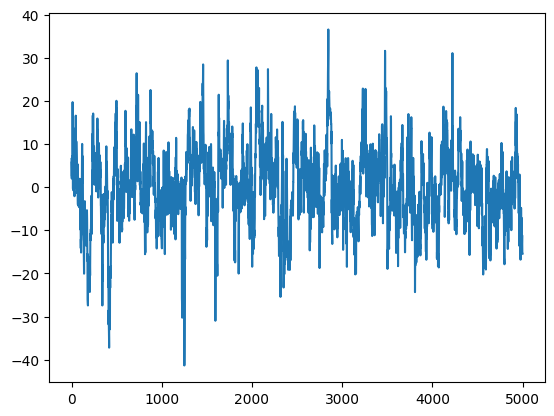

In [5]:
rsi = fc_rsi.rsi(df_icici, lookback=20)
plt.plot(rsi.values[-5000:] - 50)

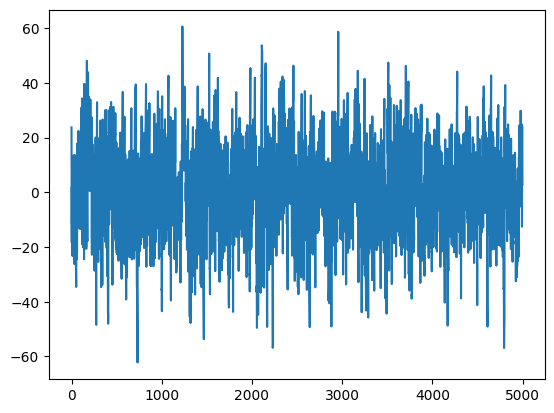

In [6]:
drsi = fc_drsi.detrended_rsi(df_icici, short_length=2, long_length=20, length=252)
plt.plot(drsi.values[-5000:])


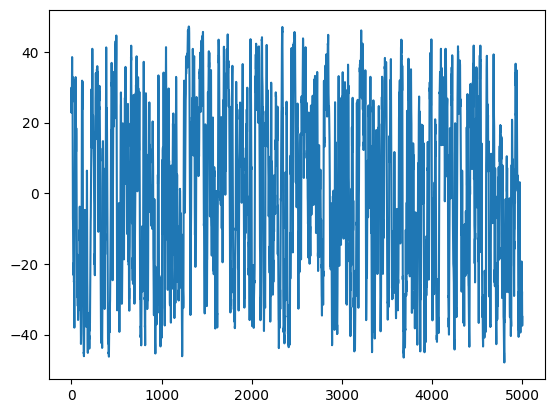

In [7]:
stoch = fc_stoch.stochastic(df_icici, lookback=20, n_to_smooth=1)
plt.plot(stoch.values[-5000:] - 50)


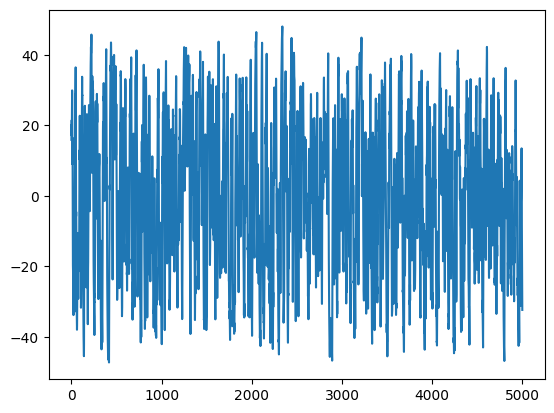

In [8]:
stoch_rsi = fc_stoch_rsi.stochastic_rsi(
  df_icici, rsi_lookback=14, stoch_lookback=14, n_to_smooth=10
)
plt.plot(stoch_rsi.values[-5000:] - 50)

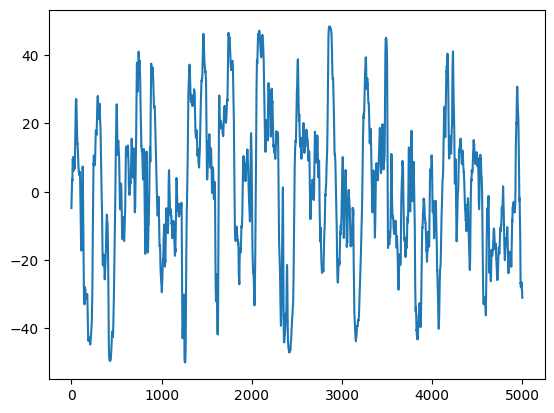

In [9]:
ma_diff = fc_ma_diff.ma_diff(df_icici, short_length=10, long_length=100, lag=10)
plt.plot(ma_diff.values[-5000:])

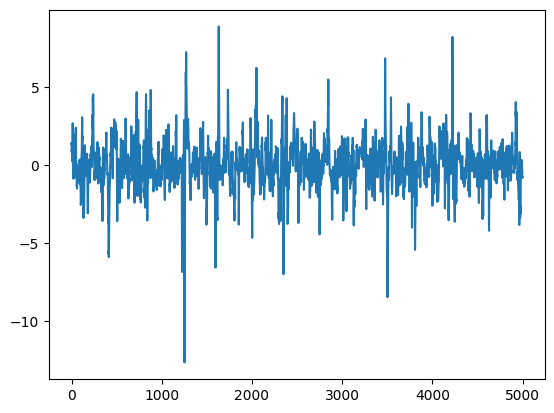

In [10]:
macd = fc_macd.macd(df_icici, short_length=10, long_length=100, n_to_smooth=5)
plt.plot(macd.values[-5000:])

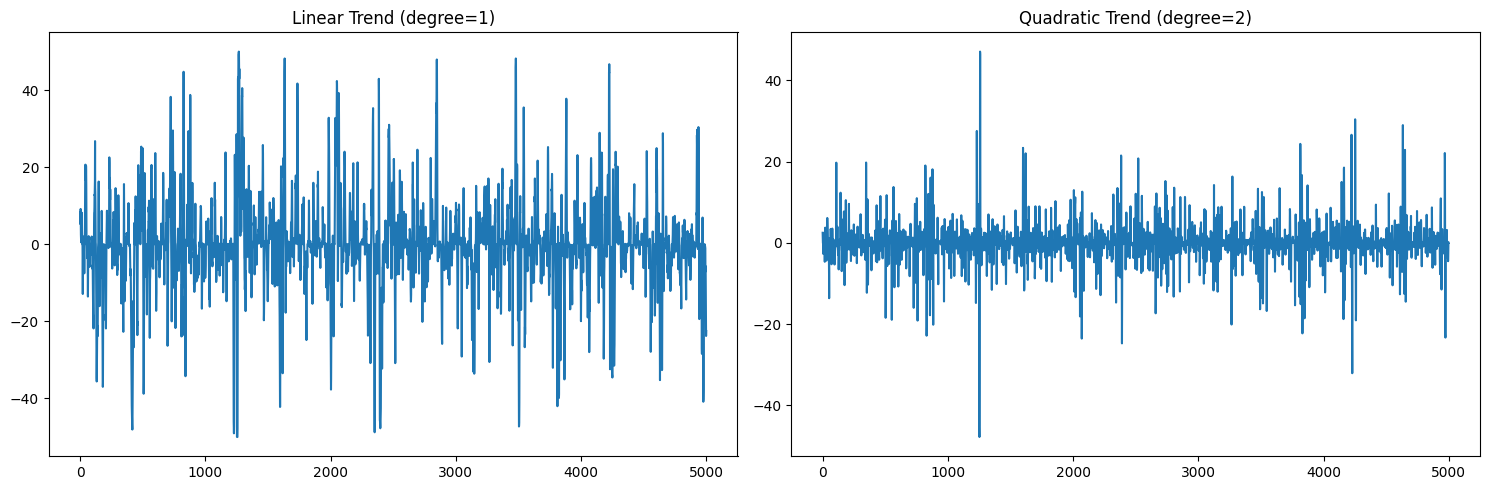

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

lin_trend = fc_lin_quad_cubic_trend.lin_quad_cubic_trend(
  df_icici, poly_degree=1, lookback=10, atr_length=252
)
ax1.plot(lin_trend.values[-5000:])
ax1.set_title("Linear Trend (degree=1)")

quad_trend = fc_lin_quad_cubic_trend.lin_quad_cubic_trend(
  df_icici, poly_degree=2, lookback=10, atr_length=252
)
ax2.plot(quad_trend.values[-5000:])
ax2.set_title("Quadratic Trend (degree=2)")

plt.tight_layout()
plt.show()

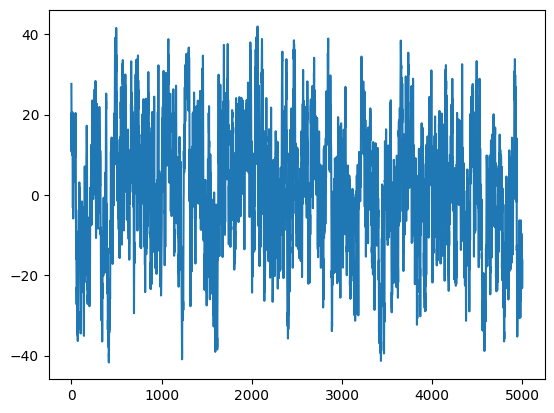

In [12]:
price_intensity = fc_price_intensity.price_intensity(df_icici, n_to_smooth=20)
plt.plot(price_intensity.values[-5000:])

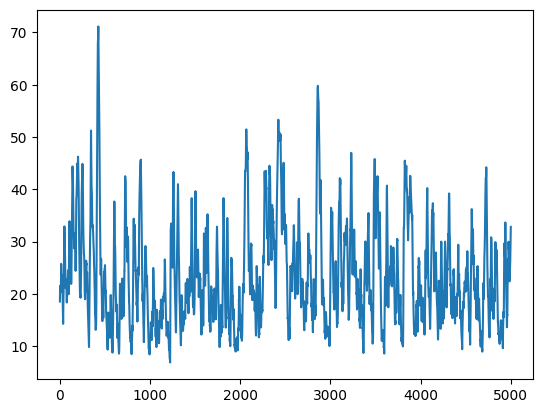

In [13]:
adx = fc_adx.adx(df_icici, lookback=14)
plt.plot(adx.values[-5000:])

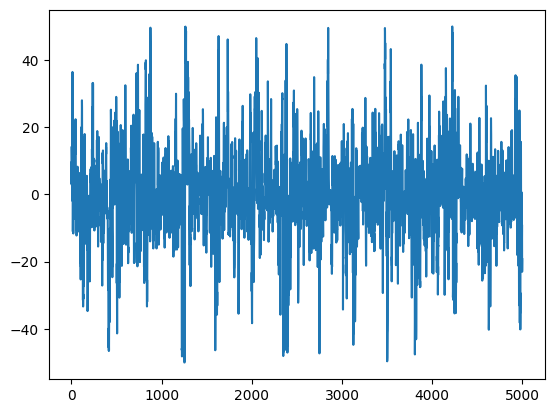

In [14]:
close_minus_ma = fc_close_minus_ma.close_minus_ma(df_icici, lookback=10, atr_length=252)
plt.plot(close_minus_ma.values[-5000:])

Calculate feature after grouping (example - resampling from 1 minute OHLCV to 30 minute OHLCV)

In [15]:
df_icici

,open,high,low,close,volume
bar_close_timestamp,,,,,
2017-01-02 03:45:59.999000+00:00,232.95,233.00,231.59,231.73,111910
2017-01-02 03:46:59.999000+00:00,231.68,231.91,231.55,231.91,48472
2017-01-02 03:47:59.999000+00:00,232.09,232.09,231.36,231.55,22959
2017-01-02 03:48:59.999000+00:00,231.55,231.55,230.86,231.18,41806
2017-01-02 03:49:59.999000+00:00,231.32,231.41,230.95,231.23,49992
...,...,...,...,...,...
2018-01-01 09:55:59.999000+00:00,310.05,310.25,309.80,309.95,152897
2018-01-01 09:56:59.999000+00:00,310.00,310.05,309.50,309.60,148260
2018-01-01 09:57:59.999000+00:00,309.55,310.00,309.55,309.55,140637


92805
Index(['close_minus_ma_10_252'], dtype='object')


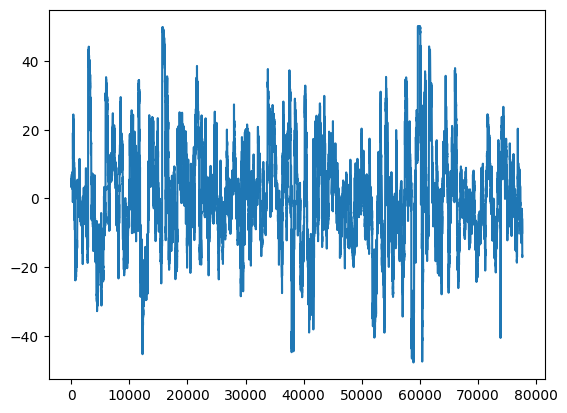

In [16]:
import functools

import algotrading_v40.feature_calculators.utils as fc_utils
import algotrading_v40.utils.df as u_df

print(len(df_icici))

feat_complete = fc_utils.calculate_features_with_complete_coverage(
  df=df_icici,
  f_calc=functools.partial(
    fc_close_minus_ma.close_minus_ma, lookback=10, atr_length=252
  ),
  group_size_minutes=60,
)
print(feat_complete.columns)
assert len(feat_complete.columns) == 1

feat_complete = feat_complete.loc[
  u_df.analyse_numeric_series_quality(
    feat_complete[feat_complete.columns[0]]
  ).good_values_mask
]
plt.plot(feat_complete[feat_complete.columns[0]].values)


Find min data points needed for a stable good value for the last row

In [17]:
# find values using fast and slow versions and show they match
# we will always use the fast version...this is just a demo to show they match

In [18]:
min_fast = fc_utils.find_min_data_points_needed_for_stable_good_last_value(
  df=df_icici,
  f_calc=functools.partial(
    fc_utils.calculate_features_with_last_value_guaranteed,
    f_calc=functools.partial(
      fc_close_minus_ma.close_minus_ma, lookback=10, atr_length=252
    ),
    group_size_minutes=60,
  ),
)
min_fast

15122

In [19]:
min_slow = fc_utils.find_min_data_points_needed_for_stable_good_last_value(
  df=df_icici,
  f_calc=functools.partial(
    fc_utils.calculate_features_with_complete_coverage,
    f_calc=functools.partial(
      fc_close_minus_ma.close_minus_ma, lookback=10, atr_length=252
    ),
    group_size_minutes=60,
  ),
)
min_slow

15122

ROUGH

In [ ]:
udf.analyse_numeric_series_quality(feat_complete["close_minus_ma_10_252"])

In [ ]:
feat_complete_2 = fc_utils.calculate_features_with_complete_coverage(
  df=df_icici[100:].copy(),
  f_calc=lambda df: fc_close_minus_ma.close_minus_ma(
    df=df, lookback=10, atr_length=252
  ),
  group_size=60,
)

In [ ]:
feat_complete_2

In [ ]:
import numpy as np

verdict = np.isclose(feat_complete_2.values, feat_complete.values[100:])

In [ ]:
verdict_flat = verdict.flatten()

n_false_at_start = 0
for i in range(len(verdict_flat)):
  if verdict_flat[i]:
    break
  n_false_at_start += 1

n_true_at_end = 0
for i in range(len(verdict_flat) - 1, -1, -1):
  if not verdict_flat[i]:
    break
  n_true_at_end += 1

if (n_false_at_start + n_true_at_end) != len(verdict_flat):
  raise ValueError("Number of False and True values at start and end do not match")

if not (
  np.all(~verdict_flat[:n_false_at_start]) and np.all(verdict_flat[-n_true_at_end:])
):
  raise ValueError(
    "Pattern is not FFFF TTTT - expected all False values at start followed by all True values at end"
  )

print(f"Number of False at start: {n_false_at_start}")
print(f"Number of True at end: {n_true_at_end}")


In [ ]:
feat_complete = feat_complete.loc[
  udf.analyse_numeric_series_quality(
    feat_complete["close_minus_ma_10_252"]
  ).good_values_mask
]
print(len(feat_complete))
plt.plot(feat_complete["close_minus_ma_10_252"].values)

In [ ]:
import algotrading_v40.bar_groupers.time_based_uniform as bg_tbu
import algotrading_v40.utils.df as udf


def _calc(bar_df):
  return fc_close_minus_ma.close_minus_ma(bar_df, lookback=10, atr_length=252)


def _group_and_calc(d):
  return udf.calculate_grouped_values(d, _calc)


df_icici["bar_group"] = bg_tbu.get_time_based_uniform_bar_group_for_indian_market(
  df=df_icici,
  group_size_minutes=30,
  offset_minutes=13,
).bar_groups

feat_g = _group_and_calc(df_icici)
feat_g = feat_g.loc[
  udf.analyse_numeric_series_quality(feat_g["close_minus_ma_10_252"]).good_values_mask
]
print(len(feat_g))
plt.plot(feat_g["close_minus_ma_10_252"].values)

In [ ]:
import algotrading_v40.bar_groupers.time_based as bg_tb
import algotrading_v40.utils.df as udf


def _calc(bar_df):
  return fc_close_minus_ma.close_minus_ma(bar_df, lookback=10, atr_length=252)


def _group_and_calc(d):
  return udf.calculate_grouped_values(d, _calc)


df_icici["bar_group"] = bg_tb.get_time_based_bar_group_for_indian_market(
  df=df_icici,
  group_size_minutes=20,
  offset_minutes=0,
)

feat_g = _group_and_calc(df_icici)
feat_g = feat_g.loc[
  udf.analyse_numeric_series_quality(feat_g["close_minus_ma_10_252"]).good_values_mask
]
print(len(feat_g))
plt.plot(feat_g["close_minus_ma_10_252"].values)

In [ ]:
import algotrading_v40.bar_groupers.int_index_based as bg_iib
import algotrading_v40.utils.df as udf


def _calc(bar_df):
  return fc_close_minus_ma.close_minus_ma(bar_df, lookback=10, atr_length=252)


def _group_and_calc(d):
  return udf.calculate_grouped_values(d, _calc)


df_icici["bar_group"] = bg_iib.get_int_index_based_bar_group(
  df=df_icici,
  group_size=20,
  offset=1,
)

feat_g = _group_and_calc(df_icici)
feat_g = feat_g.loc[
  udf.analyse_numeric_series_quality(feat_g["close_minus_ma_10_252"]).good_values_mask
]
# print(len(feat_g))
# plt.plot(feat_g["close_minus_ma_10_252"].values)

In [ ]:
feat_g

In [ ]:
feat_g